In [1]:
from ipynb.fs.full.gsearch import *

import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
%matplotlib inline
import scipy, sklearn
import IPython.display as ipd
import os
from tqdm import tqdm
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.api as sm

In [2]:
#Reading features from csv files
features_nodelta = pd.read_csv('outputs/scaled_features.csv')
features_wd1 = pd.read_csv('outputs/scaled_features_wd1.csv')
features_wd1n2 = pd.read_csv('outputs/scaled_features_wd1n2.csv')

print(features_nodelta.shape)
print(features_wd1.shape)
print(features_wd1n2.shape)

(1000, 267)
(1000, 533)
(1000, 799)


In [3]:
#turevsiz halleri
#y verilerini alirken veriyi (1000,1) matris seklinde aliyor.
#matris seklinde kullanamadigimiz fonksiyonlar var bu yuzden arraye donusturuyoruz.(1000,)
x_nodelta = features_nodelta.iloc[:,0:-1] #features
x_wd1 = features_wd1.iloc[:,0:-1] #features with derivative 1
x_wd1n2 = features_wd1n2.iloc[:,0:-1] #features with derivative 1 and 2

y = features_nodelta.iloc[:,-1:].values.reshape((1000,)) #genres

In [4]:
def modelResult(x, y):
    
    #sabitin eklenmesi
    x = sm.add_constant(x)
    
    #modelin oluşturulması
    model = sm.OLS(y, x).fit()
    
    #model performans sonuçları
    print(model.summary())


modelResult(x_nodelta,y)
modelResult(x_wd1,y)
modelResult(x_wd1n2,y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4.375
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           5.19e-56
Time:                        18:42:15   Log-Likelihood:                -2003.4
No. Observations:                1000   AIC:                             4535.
Df Residuals:                     736   BIC:                             5830.
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3.257
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           3.36e-37
Time:                        18:42:15   Log-Likelihood:                -1708.7
No. Observations:                1000   AIC:                             4471.
Df Residuals:                     473   BIC:                             7058.
Df Model:                         526                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3.358
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           1.34e-22
Time:                        18:42:15   Log-Likelihood:                -1168.4
No. Observations:                1000   AIC:                             3917.
Df Residuals:                     210   BIC:                             7794.
Df Model:                         789                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [6]:
def forwardSelection(x, y, p_value_level=0.05):

    # başlangıç değişkenleri
    initial_features = x.columns.tolist()

    # en iyi değişkenlerin listesi
    best_features = []

    loop_count = 0
    
    # değişken sayısı kadar while döngüsünün çalışması
    while (len(initial_features) > 0):

        loop_count += 1


        # seçilen değişkenler kalan değişkenlerden çıkarılır
        remaining_features = list(set(initial_features) - set(best_features))


        # kalan değişkenler için p değer tablosu
        new_pval = pd.Series(index=remaining_features, dtype='float64')

        # kalan değişkenlerin tek p değeri hesaplanır
        for feature in remaining_features:
            # verilen değişkenler ile model oluşturulur
            model = sm.OLS(y, sm.add_constant(x[best_features + [feature]])).fit()

            # newpval tablosuna değişken ismi ve p değeri eklenir
            new_pval[feature] = model.pvalues[feature]

        # new_pval tablosundaki minimum p değeri alınır
        min_p_value = new_pval.min()

        # eğer p değeri 0.05 altındaysa while döngüsü devam eder
        if(min_p_value < p_value_level):
            best_features.append(new_pval.idxmin())

        
        # eğer P değeri 0.05'in üzerinde ise döngü sona erer
        else:
            print("Mininum P değeri 0.05'ten küçük değişken kalmadi")
            break
    
    print("Best Features:",best_features)
    best_df = pd.DataFrame()
    for feature in best_features:
        best_df = pd.concat([best_df,x['{}'.format(feature)]],axis=1)
    return best_df.iloc[:,0:].values


In [7]:
x_nodelta = forwardSelection(x_nodelta, y)

Mininum P değeri 0.05'ten küçük değişken kalmadi
Best Features: ['contrast_median', 'rolloff_max', 'mfcc_2_skew', 'contrast_kurtosis', 'chroma_cqt_11_min', 'mfcc_11_min', 'rolloff_std', 'mfcc_2_median', 'poly_features_1_0_std', 'poly_features_0_0_max', 'rmse_skew', 'mfcc_2_max', 'chroma_cqt_7_std', 'mfcc_10_kurtosis', 'mfcc_8_min', 'mfcc_5_max', 'mfcc_4_max', 'poly_features_1_0_max', 'poly_features_2_2_max', 'mfcc_6_skew', 'mfcc_2_kurtosis', 'chroma_cqt_2_max', 'chroma_cqt_7_min', 'mfcc_7_skew', 'chroma_cqt_9_skew', 'mfcc_10_median', 'chroma_cqt_1_std']


In [8]:
x_wd1 = forwardSelection(x_wd1, y)

Mininum P değeri 0.05'ten küçük değişken kalmadi
Best Features: ['contrast_median', 'rolloff_max', 'mfcc_2_skew', 'contrast_kurtosis', 'chroma_cqt_11_min', 'mfcc_11_min', 'rolloff_std', 'mfcc_2_median', 'poly_features_1_0_std_d1', 'poly_features_1_1_median_d1', 'rolloff_median', 'rolloff_min_d1', 'poly_features_2_2_max', 'mfcc_2_std_d1', 'poly_features_2_2_max_d1', 'rmse_skew', 'mfcc_8_min', 'mfcc_5_max', 'chroma_cqt_7_std', 'poly_features_1_0_max', 'mfcc_4_max', 'chroma_cqt_7_std_d1', 'mfcc_3_skew', 'mfcc_3_median_d1', 'mfcc_5_skew_d1', 'chroma_cqt_1_std', 'chroma_cqt_11_mean_d1', 'chroma_cqt_2_max', 'chroma_cqt_9_skew', 'mfcc_7_skew', 'contrast_median_d1', 'mfcc_6_skew', 'poly_features_2_2_skew', 'poly_features_2_0_skew', 'mfcc_1_min', 'chroma_cqt_1_kurtosis_d1', 'chroma_cqt_5_kurtosis', 'chroma_cqt_7_max', 'bandwidth_std', 'chroma_cqt_0_skew_d1', 'mfcc_9_max', 'mfcc_9_std_d1', 'mfcc_8_skew_d1', 'zcr_mean_d1', 'poly_features_1_1_max_d1', 'chroma_cqt_10_mean', 'mfcc_0_std_d1', 'mfcc_4

In [9]:
x_wd1n2 = forwardSelection(x_wd1n2, y)

Mininum P değeri 0.05'ten küçük değişken kalmadi
Best Features: ['contrast_median', 'rolloff_std_d2', 'rmse_min_d1', 'poly_features_1_1_median_d1', 'mfcc_2_median', 'rolloff_median', 'chroma_cqt_11_min', 'chroma_cqt_5_max_d2', 'contrast_kurtosis', 'mfcc_2_max', 'poly_features_1_0_std_d1', 'poly_features_2_2_max', 'chroma_cqt_7_median_d2', 'mfcc_11_min', 'chroma_cqt_7_min', 'contrast_median_d1', 'poly_features_2_2_max_d1', 'chroma_cqt_8_min_d1', 'chroma_cqt_9_std_d2', 'mfcc_0_std_d2', 'mfcc_0_std', 'mfcc_4_min_d1', 'mfcc_1_max_d2', 'poly_features_2_2_max_d2', 'rolloff_std', 'chroma_cqt_5_kurtosis', 'chroma_cqt_9_skew', 'rmse_skew', 'mfcc_1_min_d1', 'poly_features_1_0_max', 'mfcc_8_median_d1', 'mfcc_0_mean_d2', 'chroma_cqt_1_min_d1', 'chroma_cqt_3_max_d2', 'chroma_cqt_6_median_d2', 'mfcc_3_skew', 'mfcc_4_max', 'mfcc_8_min', 'bandwidth_kurtosis_d2', 'mfcc_9_min_d2', 'chroma_cqt_11_mean_d1', 'mfcc_12_max_d2', 'chroma_cqt_2_skew_d2', 'chroma_cqt_2_max', 'mfcc_6_std', 'mfcc_12_kurtosis_d2', 

In [10]:
print(len(x_nodelta[0]))
print(len(x_wd1[0]))
print(len(x_wd1n2[0]))

27
59
56


In [19]:
gridSearchResults(x_nodelta, y, "nodelta_elimination")
gridSearchResults(x_wd1, y, "wd1_elimination")
gridSearchResults(x_wd1n2, y, "wd1n2_elimination")

C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


******************  nodelta_elimination  ********************
             Classifier  Best Score  \
0     Nearest Neighbors       0.542   
1                   SVM       0.603   
2      Gaussian Process       0.533   
3         Decision Tree       0.417   
4         Random Forest       0.569   
5            Neural Net       0.598   
6              AdaBoost       0.250   
7           Naive Bayes       0.453   
8                   QDA       0.456   
9   Logistic Regression       0.594   
10  Linear Discriminant       0.569   

                                      Best Parameters  
0   {'n_neighbors': 10, 'p': 1, 'weights': 'distan...  
1   {'C': 50, 'degree': 3, 'gamma': 'scale', 'kern...  
2                            {'max_iter_predict': 50}  
3   {'criterion': 'gini', 'max_depth': 60, 'splitt...  
4          {'criterion': 'gini', 'n_estimators': 150}  
5   {'activation': 'tanh', 'hidden_layer_sizes': (...  
6                                {'n_estimators': 10}  
7                    

C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


******************  wd1_elimination  ********************
             Classifier  Best Score  \
0     Nearest Neighbors       0.558   
1                   SVM       0.659   
2      Gaussian Process       0.591   
3         Decision Tree       0.440   
4         Random Forest       0.581   
5            Neural Net       0.649   
6              AdaBoost       0.223   
7           Naive Bayes       0.484   
8                   QDA       0.445   
9   Logistic Regression       0.642   
10  Linear Discriminant       0.661   

                                      Best Parameters  
0   {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}  
1   {'C': 5, 'degree': 3, 'gamma': 'scale', 'kerne...  
2                            {'max_iter_predict': 50}  
3   {'criterion': 'entropy', 'max_depth': 30, 'spl...  
4          {'criterion': 'gini', 'n_estimators': 150}  
5   {'activation': 'relu', 'hidden_layer_sizes': (...  
6                                {'n_estimators': 10}  
7                        

C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


******************  wd1n2_elimination  ********************
             Classifier  Best Score  \
0     Nearest Neighbors       0.579   
1                   SVM       0.690   
2      Gaussian Process       0.594   
3         Decision Tree       0.428   
4         Random Forest       0.585   
5            Neural Net       0.684   
6              AdaBoost       0.235   
7           Naive Bayes       0.505   
8                   QDA       0.438   
9   Logistic Regression       0.691   
10  Linear Discriminant       0.669   

                                      Best Parameters  
0   {'n_neighbors': 20, 'p': 2, 'weights': 'distan...  
1   {'C': 5, 'degree': 3, 'gamma': 'scale', 'kerne...  
2                            {'max_iter_predict': 50}  
3   {'criterion': 'entropy', 'max_depth': 30, 'spl...  
4          {'criterion': 'gini', 'n_estimators': 150}  
5   {'activation': 'relu', 'hidden_layer_sizes': (...  
6                                {'n_estimators': 10}  
7                      

Accuracy:  0.603
Recall:  0.603
Precision:  0.5989093741360668
F1 Score :  0.5989784398223461
Cohens Kappa :  0.558888888888889


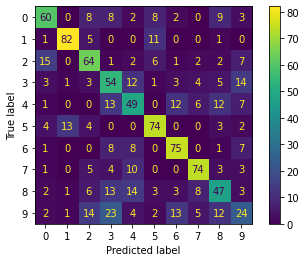

In [11]:
# confusion matrix accuracy precision recall kappa
#turevsiz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score


svc_clf = SVC(C=50, degree=3,gamma='scale',kernel='rbf')
y_nodelta_pred = cross_val_predict(svc_clf, x_nodelta, y, cv=5)

cm_nodelta = confusion_matrix(y, y_nodelta_pred.ravel())
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot()

print("Accuracy: ",accuracy_score(y, y_nodelta_pred))
print("Recall: ",recall_score(y, y_nodelta_pred, average = 'macro'))
print("Precision: ",precision_score(y, y_nodelta_pred, average ='macro'))
print("F1 Score : ",f1_score(y, y_nodelta_pred, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y, y_nodelta_pred))


Accuracy:  0.661
Recall:  0.661
Precision:  0.6654779440373695
F1 Score :  0.6588759872458871
Cohens Kappa :  0.6233333333333333


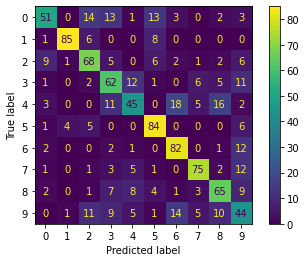

In [12]:
lda_clf = LinearDiscriminantAnalysis(solver='svd')
y_wd1_pred = cross_val_predict(lda_clf, x_wd1, y, cv=5)

cm_wd1 = confusion_matrix(y, y_wd1_pred.ravel())
disp_wd1 = ConfusionMatrixDisplay(confusion_matrix=cm_wd1)
disp_wd1.plot()

print("Accuracy: ",accuracy_score(y, y_wd1_pred))
print("Recall: ",recall_score(y, y_wd1_pred, average = 'macro'))
print("Precision: ",precision_score(y, y_wd1_pred, average ='macro'))
print("F1 Score : ",f1_score(y, y_wd1_pred, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y, y_wd1_pred))


C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy:  0.683
Recall:  0.683
Precision:  0.6812919467503671
F1 Score :  0.6803029390203471
Cohens Kappa :  0.6477777777777778


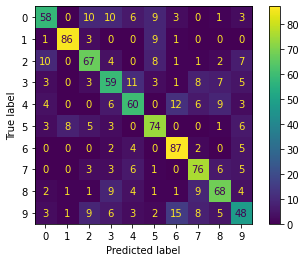

In [15]:
log_clf = LogisticRegression(C=10, max_iter=300, solver='lbfgs')
y_wd1n2_pred = cross_val_predict(log_clf, x_wd1n2, y, cv=5)

cm_wd1n2 = confusion_matrix(y, y_wd1n2_pred.ravel())
disp_wd1n2 = ConfusionMatrixDisplay(confusion_matrix=cm_wd1n2)
disp_wd1n2.plot()

print("Accuracy: ",accuracy_score(y, y_wd1n2_pred))
print("Recall: ",recall_score(y, y_wd1n2_pred, average = 'macro'))
print("Precision: ",precision_score(y, y_wd1n2_pred, average ='macro'))
print("F1 Score : ",f1_score(y, y_wd1n2_pred, average='macro'))
print("Cohens Kappa : ",cohen_kappa_score(y, y_wd1n2_pred))
